In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [2]:
ordinal_ridge = pd.read_csv('../../Machine Learning Models/Stacking/Ensemble(R+XGB)/Ordinal+Ridge.csv')
ordinal_ridge.shape

(2580, 84)

In [3]:
ordinal_ridge

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,Unnamed: 0.1,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Ridge
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,1,909176150,856,126000,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,119695.642722
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,2,905476230,1049,139500,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,118142.328347
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,3,911128020,1001,124900,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,129798.673755
3,3,11.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,20.0,2.0,2.0,0.0,5.0,1.0,0.0,8.0,8.0,2.0,2.0,2.0,0.0,1.0,5.0,3.0,6.0,6.0,1.0,2.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,4,535377150,1039,114000,80.000000,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,106623.231899
4,4,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,17.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,2.0,3.0,9.0,4.0,5,534177230,1665,227000,70.000000,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,210723.127056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,2575,6.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,3.0,2.0,2.0,0.0,1.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,0.0,5.0,5.0,3.0,6.0,6.0,3.0,1.0,0.0,1.0,1.0,6.0,2.0,5.0,3.0,1.0,4.0,1.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,759,903205040,952,121000,68.516053,8854,6,6,1916,1950,0.0,0.0,0.0,952.0,952.0,952,0,0,0.0,0.0,1,0,2,1,4,1,1916.0,1.0,192.0,0,98,0,0,40,0,0,117360.049696
2576,2576,5.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,7.0,2.0,2.0,0.0,2.0,3.0,0.0,3.0,14.0,2.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,1.0,0.0,1.0,0.0,4.0,3.0,2.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,3.0,9.0,4.0,760,905402060,1733,139600,68.516053,13680,3,5,1955,1955,0.0,0.0,0.0,0.0,0.0,1733,0,0,0.0,0.0,2,0,4,1,8,1,1955.0,2.0,452.0,0,0,0,0,0,0,0,138053.585574
2577,2577,15.0,4.0,1.0,1.0,3.0,1.0,0.0,4.0,0.0,6.0,2.0,2.0,2.0,5.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,6.0,1.0,4.0,0.0,0.0,4.0,6.0,3.0,0.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,10.0,1.0,9.0,4.0,761,909275030,2002,145000,82.000000,6270,5,6,1949,1950,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,0.0,0.0,2,0,4,2,8,0,1949.0,3.0,871.0,0,0,0,0,0,0,0,165687.

In [4]:
X_ordinal = ordinal_ridge.drop(['SalePrice'], axis=1).values
Y_ordinal = ordinal_ridge.SalePrice.values

In [5]:
X_ordinal.shape

(2580, 83)

In [6]:
len(Y_ordinal)

2580

In [7]:
X_ordinal.shape[1]

83

In [8]:
Scores = []
AdjR2 = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_ordinal,Y_ordinal,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    xgb = XGBRegressor()
    xgb.fit(X_train_scaled, Y_train)
    XGB_Score = xgb.score(X_test_scaled, Y_test)
    
    Scores.append(XGB_Score)
    
    Adj_r2 = 1 - (1 - XGB_Score) * (len(Y_ordinal)-1)/(len(Y_ordinal)-X_ordinal.shape[1]-1)
    AdjR2.append(Adj_r2)
    

In [9]:
PositiveR2 = []
NegativeR2 = []

for i in Scores:
    if i < 0:
        NegativeR2.append(i)
    else:
        PositiveR2.append(i)

In [10]:
PositiveAR2 = []
NegativeAR2 = []

for i in AdjR2:
    if i < 0:
        NegativeAR2.append(i)
    else:
        PositiveAR2.append(i)

In [11]:
R2 = pd.DataFrame(PositiveR2, columns=['R_Squared'])
AR2 = pd.DataFrame(PositiveAR2, columns=['Adjusted_R2'])
R2vAR2 = pd.concat([R2, AR2], axis=1)
R2vAR2

,R_Squared,Adjusted_R2
0,0.902359,0.899113
1,0.946562,0.944785
2,0.951294,0.949674
3,0.893371,0.889825
4,0.862023,0.857435
...,...,...
95,0.946669,0.944895
96,0.946922,0.945157
97,0.947703,0.945964
98,0.936466,0.934353


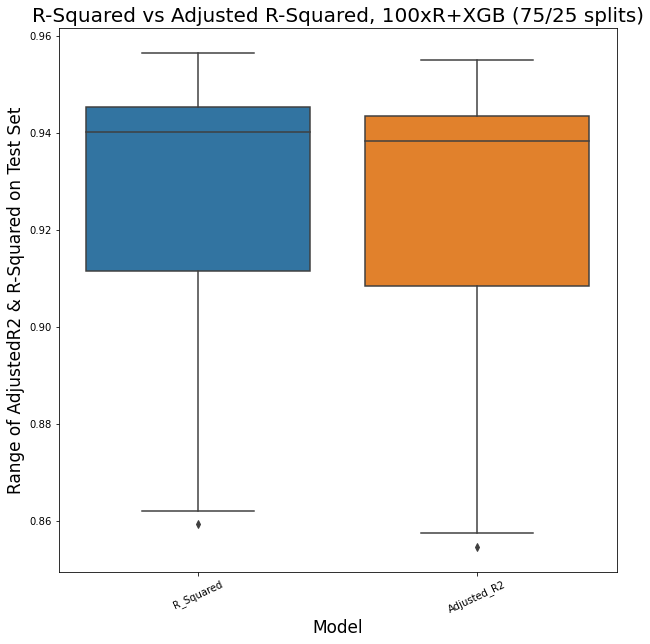

In [12]:
plt.figure(figsize=(10,10))
plt.title('R-Squared vs Adjusted R-Squared, 100xR+XGB (75/25 splits)', fontsize=20)
plt.ylabel('Range of AdjustedR2 & R-Squared on Test Set', fontsize=17)
plt.xlabel('Model', fontsize=17)
sns.boxplot(data=R2vAR2)
plt.xticks(rotation=25);

In [13]:
print("Number of times results produced Negative R2: " + str((len(NegativeR2))))
print("Number of times results produced Negative Adjusted R2: " + str((len(NegativeAR2))))

Number of times results produced Negative R2: 0
Number of times results produced Negative Adjusted R2: 0


In [14]:
R2vAR2.to_csv('R+XGB_R2vAR2.csv', index=False)

In [15]:
R2vAR2['Difference'] = R2vAR2['R_Squared'] - R2vAR2['Adjusted_R2']

In [16]:
R2vAR2

,R_Squared,Adjusted_R2,Difference
0,0.902359,0.899113,0.003247
1,0.946562,0.944785,0.001777
2,0.951294,0.949674,0.001620
3,0.893371,0.889825,0.003546
4,0.862023,0.857435,0.004588
...,...,...,...
95,0.946669,0.944895,0.001773
96,0.946922,0.945157,0.001765
97,0.947703,0.945964,0.001739
98,0.936466,0.934353,0.002113


In [17]:
R2vAR2.Difference.mean()

0.0023415173119897825

In [18]:
R2vAR2.describe()

,R_Squared,Adjusted_R2,Difference
count,100.000000,100.000000,100.000000
mean,0.929585,0.927244,0.002342
std,0.021763,0.022487,0.000724
min,0.859298,0.854619,0.001448
25%,0.911413,0.908467,0.001822
50%,0.940183,0.938193,0.001989
75%,0.945196,0.943374,0.002946
max,0.956461,0.955013,0.004679
